### 사이킷런 LinearRegression을 활용한 보스턴 주택 가격 예측

#### LinearRegression 클래스 - Ordinary Least Squares

- LinearRegression는 RSS를 최소화해 OLS(Ordinary Least Sqaures) 추정 방식으로 구현한 클래스이다.

- 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장한다

#### <입력 파라미터>

- fit_intercept: default=True, 절편값을 계산할건지 말지를 지정함. False면 0으로 지정

- normalize: default=False, 회귀 수행 전에 입력데이터셋을 정규화함. fit_intersept가 False인 경우에 이 파라미터는 무시됨

#### <속성>

- coef_: fit을 수행했을 때, 회귀 계수가 배열 형태로 저장하는 속성. shape=(target값 개수, 피처 개수)

- intercept_: 절편값


OLS기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다.

피처 간의 상관관계가 높을 경우, 오류에 민감해져서 다중공선성 문제가 생긴다.

따라서, PCA를 통해 차원 축소를 진행하는 것을 고려해야 한다.

In [18]:
from sklearn.linear_model import LinearRegression
LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)

LinearRegression(n_jobs=1)

#### 회귀 평가 지표

- 실제값과 예측값의 차이를 기반으로 한 지표가 중심이다.

- 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄되기 때문에 절댓값의 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구해야 한다.

#### <평가 지표 종류>

- MAE:Mean Absolute Error, 실제값과 예측값의 차이를 절댓값 씌운 후 평균낸 것

- MSE: Mean Squared Error, 차이를 제곱하여 평균낸 것, 제곱했기 때문에 실제 오류 평균보다 값이 더 커지는 특징이 있음

- RMSE: Root Mean Squared Error, MSE에 루트를 씌운 것

- R^: 분산 기반, 실제값의 분산 대비 예측값의 분산 비율, 1에 가까울수록 정확한 것

#### 보스턴 주택 가격 회귀

(윤리 이슈로 sklearn 내장 데이터셋에서 load_boston이 사라졌음. 따라서, 데이콘 연습대회에서 데이터셋을 가져오겠음)

https://dacon.io/competitions/open/236065/data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

boston_df = pd.read_csv('/content/train.csv')
print('Boston 데이터셋 크기:', boston_df.shape)
boston_df.head()

Boston 데이터셋 크기: (455, 15)


,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       455 non-null    object 
 1   CRIM     455 non-null    float64
 2   ZN       455 non-null    float64
 3   INDUS    455 non-null    float64
 4   CHAS     455 non-null    float64
 5   NOX      455 non-null    float64
 6   RM       455 non-null    float64
 7   AGE      455 non-null    float64
 8   DIS      455 non-null    float64
 9   RAD      455 non-null    float64
 10  TAX      455 non-null    float64
 11  PTRATIO  455 non-null    float64
 12  B        455 non-null    float64
 13  LSTAT    455 non-null    float64
 14  MEDV     455 non-null    float64
dtypes: float64(14), object(1)
memory usage: 53.4+ KB


각 칼럼이 회귀 결과에 미치는 영향이 어느정도인지 시각화해서 알아보자

- sesborn의 regplot() 함수: 산점도와 함께 선형 회귀 직선을 그려줌


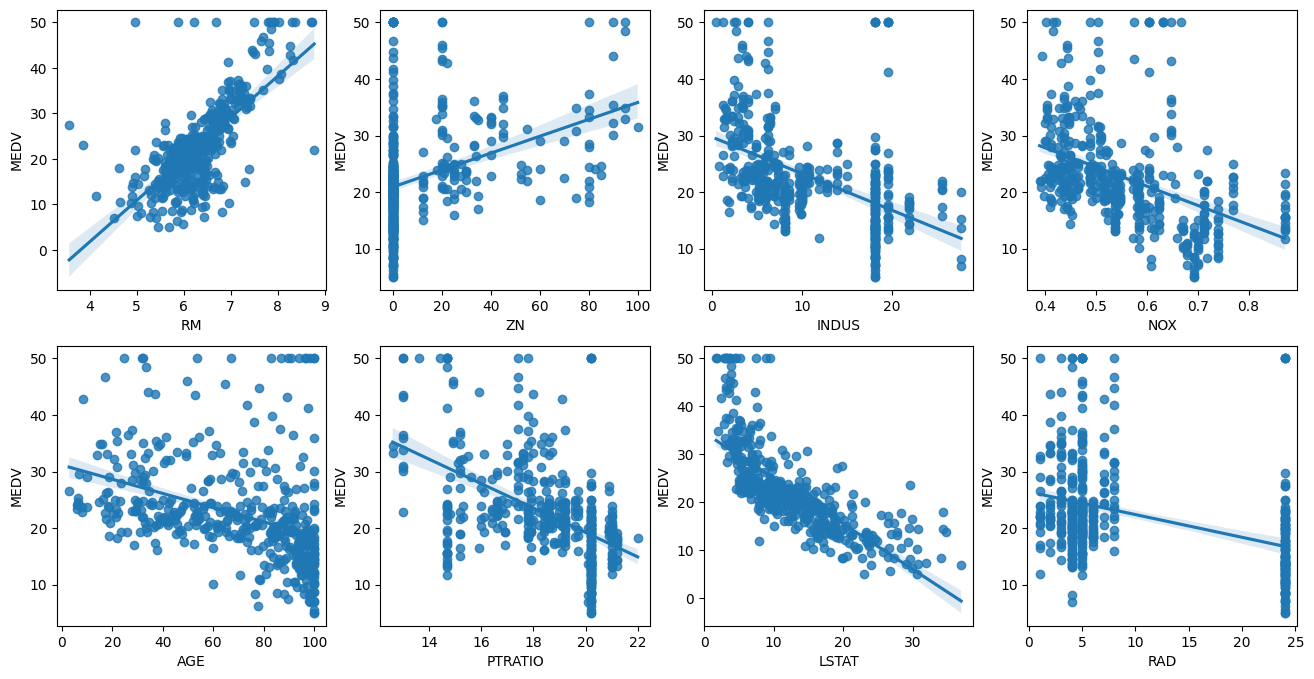

In [9]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i % 4
  sns.regplot(x=feature, y='MEDV', data=boston_df, ax=axs[row][col])

다른 칼럼에 비해 RM과 LSTAT의 MEDV 영향도가 두드러짐

특히 RM(방 개수)는 양의 선형성이 큼 >> 방의 크기가 클수록 가격이 증가

LSTAT(하위 계층 비율)은 음의 선형성이 큼 >> 하위 계층 비율이 작을수록 가격이 증가

In [10]:
#모델링
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['MEDV']
X_data = boston_df.drop(['ID', 'MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=156)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 23.466, RMSE: 4.844
Variance score: 0.711


절편값과 회귀 계수값 확인하기

In [14]:
print('절편값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편값: 32.55235718719823
회귀 계수값: [ -0.1   0.    0.1   1.6 -17.7   4.3   0.   -1.2   0.3  -0.   -1.    0.
  -0.5]


피처별 회귀 계수값으로 다시 매핑하고 높은 순으로 정렬하기

In [15]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          4.3
CHAS        1.6
RAD         0.3
INDUS       0.1
ZN          0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.2
NOX       -17.7
dtype: float64

5개의 폴드 세트에서 cross_val_score()를 이용하여 교차 검증으로 MSE와 RMSE를 측정하자

In [17]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE scores: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-19.66 -20.13 -26.57 -29.77 -24.79]
5 folds의 개별 RMSE scores:  [4.43 4.49 5.15 5.46 4.98]
5 folds의 평균 RMSE scores: 4.902
